In [1]:
from utils_torsion_dataset_generator import *

RDKit WARNING: [23:38:18] Enabling RDKit 2019.09.3 jupyter extensions
Failed to import the evaluator package.


#### `OpenFF Gen 2 Torsion Set 6 supplemental` 
- input dataset: supplemental set

In [5]:
%%capture cap --no-stderr

# Create force field object
forcefield = ForceField('param_valence.offxml', allow_cosmetic_attributes=True)

# Create dictionaries storing molecules and attributes 
parse_input('supplemental_input.smi', output_json='supplemental_optimization_inputs.json')
molecules_list_dict, molecule_attributes = read_aggregate_molecules("supplemental_optimization_inputs.json")

# List torsion parameters and effective rotations matched to each parameter from input molecule set
tid_list = {'t103', 't104', 't105', 't116', 't149', 't51b', 't58'}
tid_molecules_list = gen_tid_molecules_list_of_interest(molecule_attributes, molecules_list_dict, forcefield, tid_list)
# Select molecules which minimize data degeneracy
# Select one molecule per torsion parameter
# Maximize the reuse of pre-calculated torsion scans
graph, graph_single_coverage_set, graph_multiple_coverage_sets = gen_graph(tid_molecules_list)
selected , final_coverage, final_overlap, coverage_history, overlap_history = find_minimum_degeneracy_check_coverage(graph_single_coverage_set, graph_multiple_coverage_sets)
draw_graph(selected, graph_single_coverage_set)
selected_rotations, molecules_list_dict_updated = select_rotations(tid_molecules_list, selected,  molecules_list_dict,tid_calculated_molecules_list=None, molecules_list_dict_from_td=None)

# Store selected molecules into json file
gen_json(selected_rotations, molecule_attributes, molecules_list_dict_updated, output_json='supplemental_selected_torsions.json')


In [6]:
with open('select.log', 'w') as f:
    f.write(cap.stdout)

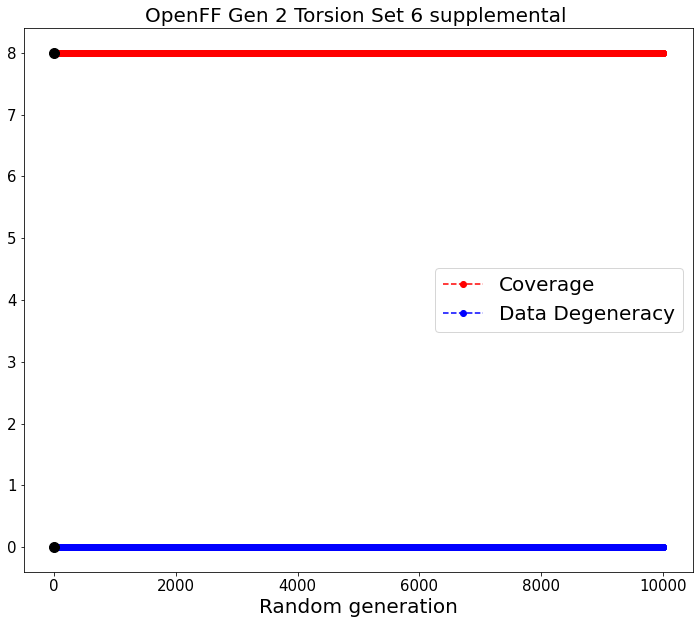

In [7]:

plt.figure(figsize=(12,10))
plt.plot(range(len(coverage_history)), coverage_history,'ro--', label='Coverage')
plt.scatter([overlap_history.index(final_overlap)], [final_coverage],c='k', s=100,zorder=10)
plt.plot(range(len(overlap_history)), overlap_history, 'bo--', label='Data Degeneracy')
plt.scatter([overlap_history.index(final_overlap)], [final_overlap],c='k', s=100,zorder=10)

plt.xlabel('Random generation', fontdict = {'fontsize' : 20})
plt.title('OpenFF Gen 2 Torsion Set 6 supplemental ', fontdict = {'fontsize' : 20})
plt.legend(prop={'size': 20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()